In [16]:
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn.model_selection import train_test_split

In [17]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

X = train.drop("label", axis=1)
y = train["label"]

X = X / 255.0
test = test / 255.0

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [18]:
model = keras.Sequential([
    layers.Input(shape=(784,)),

    layers.Dense(1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(10, activation='softmax')
])

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.9052 - loss: 0.3466 - val_accuracy: 0.8513 - val_loss: 0.6909
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.9643 - loss: 0.1126 - val_accuracy: 0.8946 - val_loss: 0.4325
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.9768 - loss: 0.0721 - val_accuracy: 0.9398 - val_loss: 0.2287
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.9845 - loss: 0.0485 - val_accuracy: 0.9573 - val_loss: 0.1458
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.9881 - loss: 0.0374 - val_accuracy: 0.9662 - val_loss: 0.1038
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.9890 - loss: 0.0322 - val_accuracy: 0.9740 - val_loss: 0.0843
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.9914 - loss: 0.0270 - val_accuracy: 0.9744 - val_loss: 0.0834
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.9925 - loss: 0.0231 - val_accuracy: 0.9749 - v

<Axes: title={'center': 'Accuracy'}>

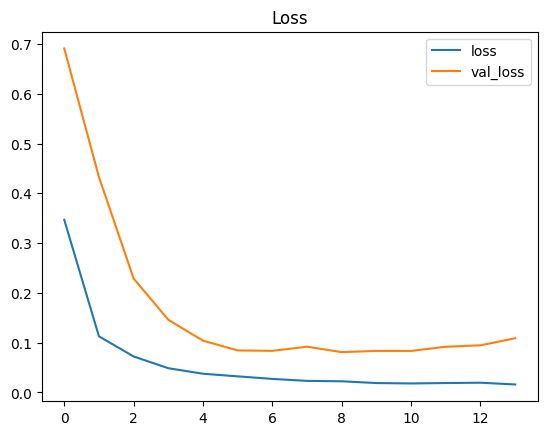

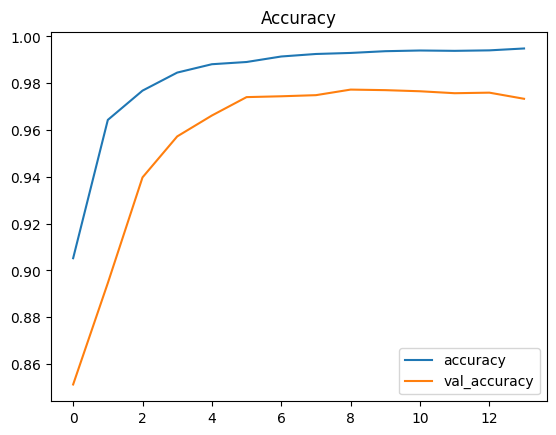

In [19]:
model.compile(
    optimizer='adam',
    loss='crossentropy',
    metrics=['accuracy']
)
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    restore_best_weights=True
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    callbacks=[early_stopping],
    verbose=1
)
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(title="Loss")
history_df[['accuracy', 'val_accuracy']].plot(title="Accuracy")

In [20]:
print(("Best Validation Loss: {:0.4f}" + 
       "\nBest Validation Accuracy: {:0.4f}").format(
           history_df['val_loss'].min(),
           history_df['val_accuracy'].max()))

Best Validation Loss: 0.0808
Best Validation Accuracy: 0.9773


In [22]:
pred= model.predict(test)
pred_labels = pred.argmax(axis=1)

output = pd.DataFrame({
    "ImageId": range(1, len(pred_labels) + 1),  # start from 1
    "Label": pred_labels
})

submission_file_name = f'submission_{pd.Timestamp.now().strftime("%Y-%m-%d_%H-%M-%S")}.csv'

output.to_csv(submission_file_name, index=False)


875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
